<center style="border-radius:10px;
padding: 3rem 2rem;
border: 3px solid #FA8237;
">
<h1 style="color:#FA8237; 
font-size:3.0rem;
margin:0;
">Prediction of Solar Irradiance</h1>
<h2 style="color:#FA8237; 
font-size:2.0rem;
margin-top:1rem;
margin-bottom:2.5rem;
">SolarPrediction Dataset</h2>
<a href="" style="color: white;
background-color: #FA8237;
border-radius: 25px;
padding: 1rem 1.5rem;
text-decoration: none;
">@Balaji</a>
</center>

## *Prediction of Solar Radiation on given weather data
<div style="width:100%;height:0;border-bottom: 3px solid #F59A31;margin-bottom: 1rem;"></div>

These datasets are meteorological data from the HI-SEAS weather station from four months (September through December 2016)
* Dataset consists different features like

* Solar Irradiance [W/m^2]
* Temperature [F]
* Atmospheric pressure [Hg]
* Humidity [%]
* Wind speed [miles/h]
* Wind direction [degrees]

Our objective is to derive an ML model to forecast the solar radiation as a function of avilable features. 

### *Importing Libraries
<div style="width:100%;height:0;border-bottom: 3px solid #F59A31;margin-bottom: 1rem;"></div>

In [1]:
import re         #for searching string in a given large text
import numpy as np #for scientific computing 
import pandas as pd #to perform computations on series of data(dataframe)

import matplotlib.pyplot as plt #for visulaization of data
import seaborn as sns

from datetime import datetime
from dateutil.tz import *

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Ridge

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Sequential
from collections import Counter

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")


### *Loading Dataset
<div style="width:100%;height:0;border-bottom: 3px solid #F59A31;margin-bottom: 1rem;"></div>

In [2]:
df=pd.read_csv('SolarPrediction.csv')
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [3]:
#checking each feature datatype
# to correct datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [4]:
#rename columns
df=df.rename(columns={'Data':'Date'})
df.head()

,UNIXTime,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [5]:
#find dimension and shape of dataframe
print(df.ndim)
print(df.shape)
print(df.size)

2
(32686, 11)
359546


### *Data Preprocessing
<div style="width:100%;height:0;border-bottom: 3px solid #F59A31;margin-bottom: 1rem;"></div>

In this section,we make sure that data is free from duplicates, missing values ,outliers.--->Data Cleaning
                                     *Data Transformation-->converting data into desired form.
                                     *Data Normalization -->Scaling numerical data to a standard range.

In [6]:
#checking for missing values
#missing values can be handled by imputation 1.mean,median,mode strategies 2.forward,backward 3.model prediction
#from skleran.impute import SimpleImputer
df.isnull().sum()

UNIXTime                  0
Date                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [7]:
#checking for duplicates of data
# how handle duplicates 1.remove duplicates 2.keep first,last occurance 3.mark duplicates by addiing new boolean column
df.duplicated().sum()

0

In [8]:
df.columns

Index(['UNIXTime', 'Date', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')

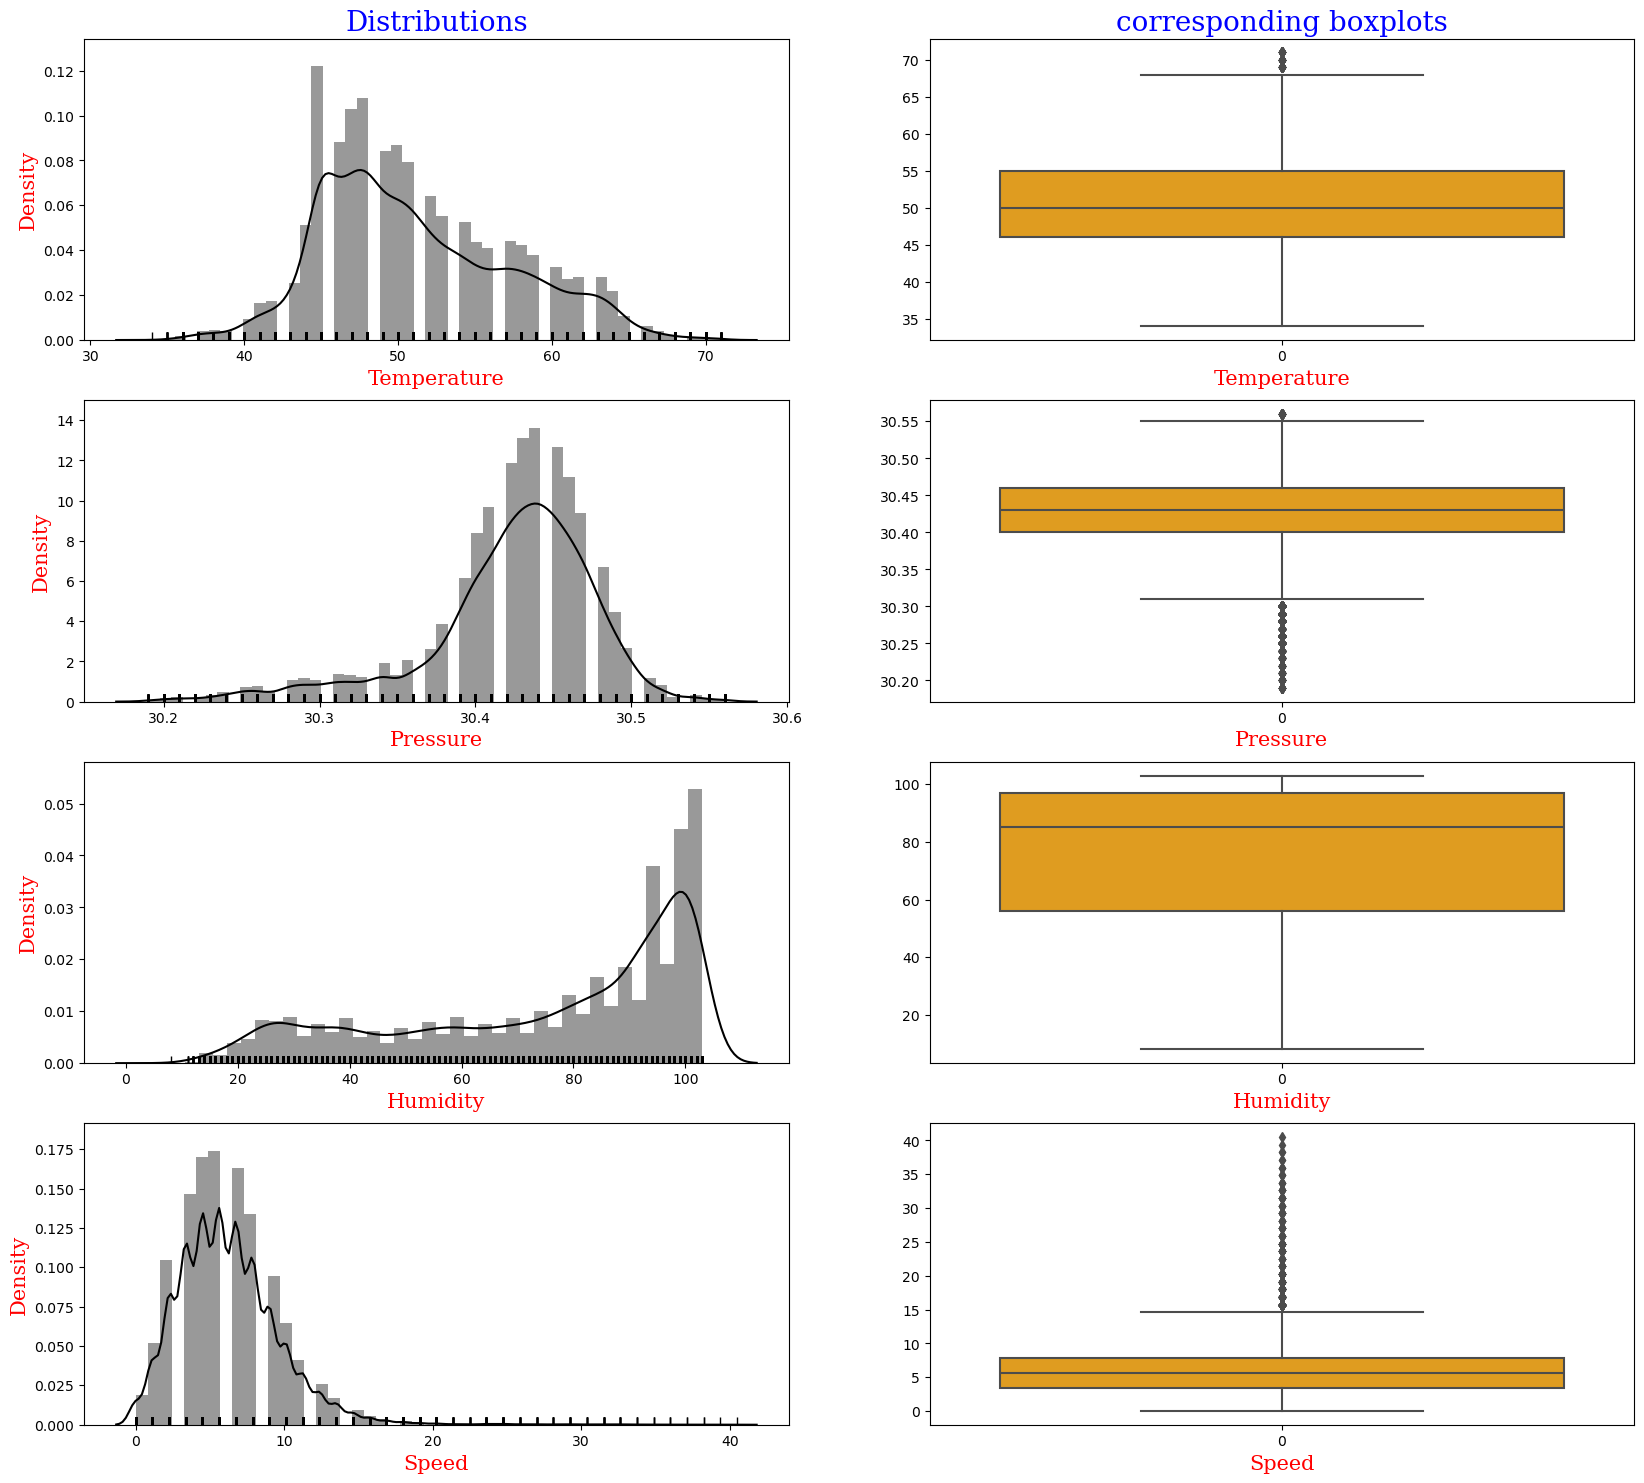

In [9]:
#checking for outliers
#outliers can be found by using boxplot
plt.figure(figsize=(20,18))

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.subplot(4,2,1)
plt.title("Distributions",fontdict=font1)
p=plt.xlabel("Temperature",fontdict=font2)
p.set_color("red")
p=plt.ylabel("Density",fontdict=font2)
p.set_color("red")
sns.distplot(df['Temperature'],rug=True,color='black')
plt.subplot(4,2,2)
plt.title("corresponding boxplots",fontdict=font1)
p=plt.xlabel("Temperature",fontdict=font2)
p.set_color("red")
sns.boxplot(df['Temperature'],color='orange')

plt.subplot(4,2,3)
p=plt.xlabel("Pressure",fontdict=font2)
p.set_color("red")
p=plt.ylabel("Density",fontdict=font2)
p.set_color("red")
sns.distplot(df['Pressure'],rug=True,color='black')
plt.subplot(4,2,4)
p=plt.xlabel("Pressure",fontdict=font2)
p.set_color("red")
sns.boxplot(df['Pressure'],color='orange')

plt.subplot(4,2,5)
p=plt.xlabel("Humidity",fontdict=font2)
p.set_color("red")
p=plt.ylabel("Density",fontdict=font2)
p.set_color("red")
sns.distplot(df['Humidity'],rug=True,color='black')
plt.subplot(4,2,6)
p=plt.xlabel("Humidity",fontdict=font2)
p.set_color("red")
sns.boxplot(df['Humidity'],color='orange')

plt.subplot(4,2,7)
p=plt.xlabel("Speed",fontdict=font2)
p.set_color("red")
p=plt.ylabel("Density",fontdict=font2)
p.set_color("red")
sns.distplot(df['Speed'],rug=True,color='black')
plt.subplot(4,2,8)
p=plt.xlabel("Speed",fontdict=font2)
p.set_color("red")
sns.boxplot(df['Speed'],color='orange')

plt.show()

## * for handling outliers we use different methods based on the distribution of data
* For Normally Distributed Data:
Visual Inspection: Start by visually inspecting the distribution using histograms or Q-Q plots to check for symmetry and normality.
Z-Score Method: Use the z-score method to identify outliers. Typically, values beyond ±3 standard deviations from the mean are considered outliers.

*  For Skewed Data:
Percentile-based Methods: Use percentile-based methods like interquartile range (IQR) to identify outliers. Values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered outliers

* For Heavy-tailed Distributions:
Trimming: Trim the extreme values from the dataset if they are clearly outliers and do not represent genuine data points.

<div style="width:100%;height:0;border-bottom: 3px solid #F59A31;margin-bottom: 1rem;"></div>

In [10]:
# knowing statistical info about data
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [11]:
# finding outliers of temperature and filling with min and max
percentile25 = df["Temperature"].quantile(0.25)
percentile75 = df["Temperature"].quantile(0.75)

IQR = percentile75 - percentile25

min = percentile25 - 1.5*IQR
max = percentile75 + 1.5*IQR


df["Temperature"] = np.where(df["Temperature"]>max,
         max, 
         np.where(df["Temperature"]<min,min, df["Temperature"]))


In [12]:
# finding outliers of pressure and filling with min and max
percentile25 = df["Pressure"].quantile(0.25)
percentile75 = df["Pressure"].quantile(0.75)

IQR = percentile75 - percentile25

min = percentile25 - 1.5*IQR
max = percentile75 + 1.5*IQR


df["Pressure"] = np.where(df["Pressure"]>max,
         max, 
         np.where(df["Pressure"]<min,min, df["Pressure"]))

In [13]:
# finding outliers of speed and filling with min and max
percentile25 = df["Speed"].quantile(0.25)
percentile75 = df["Speed"].quantile(0.75)

IQR = percentile75 - percentile25

min = percentile25 - 1.5*IQR
max = percentile75 + 1.5*IQR


df["Speed"] = np.where(df["Speed"]>max,
         max, 
         np.where(df["Speed"]<min,min, df["Speed"]))

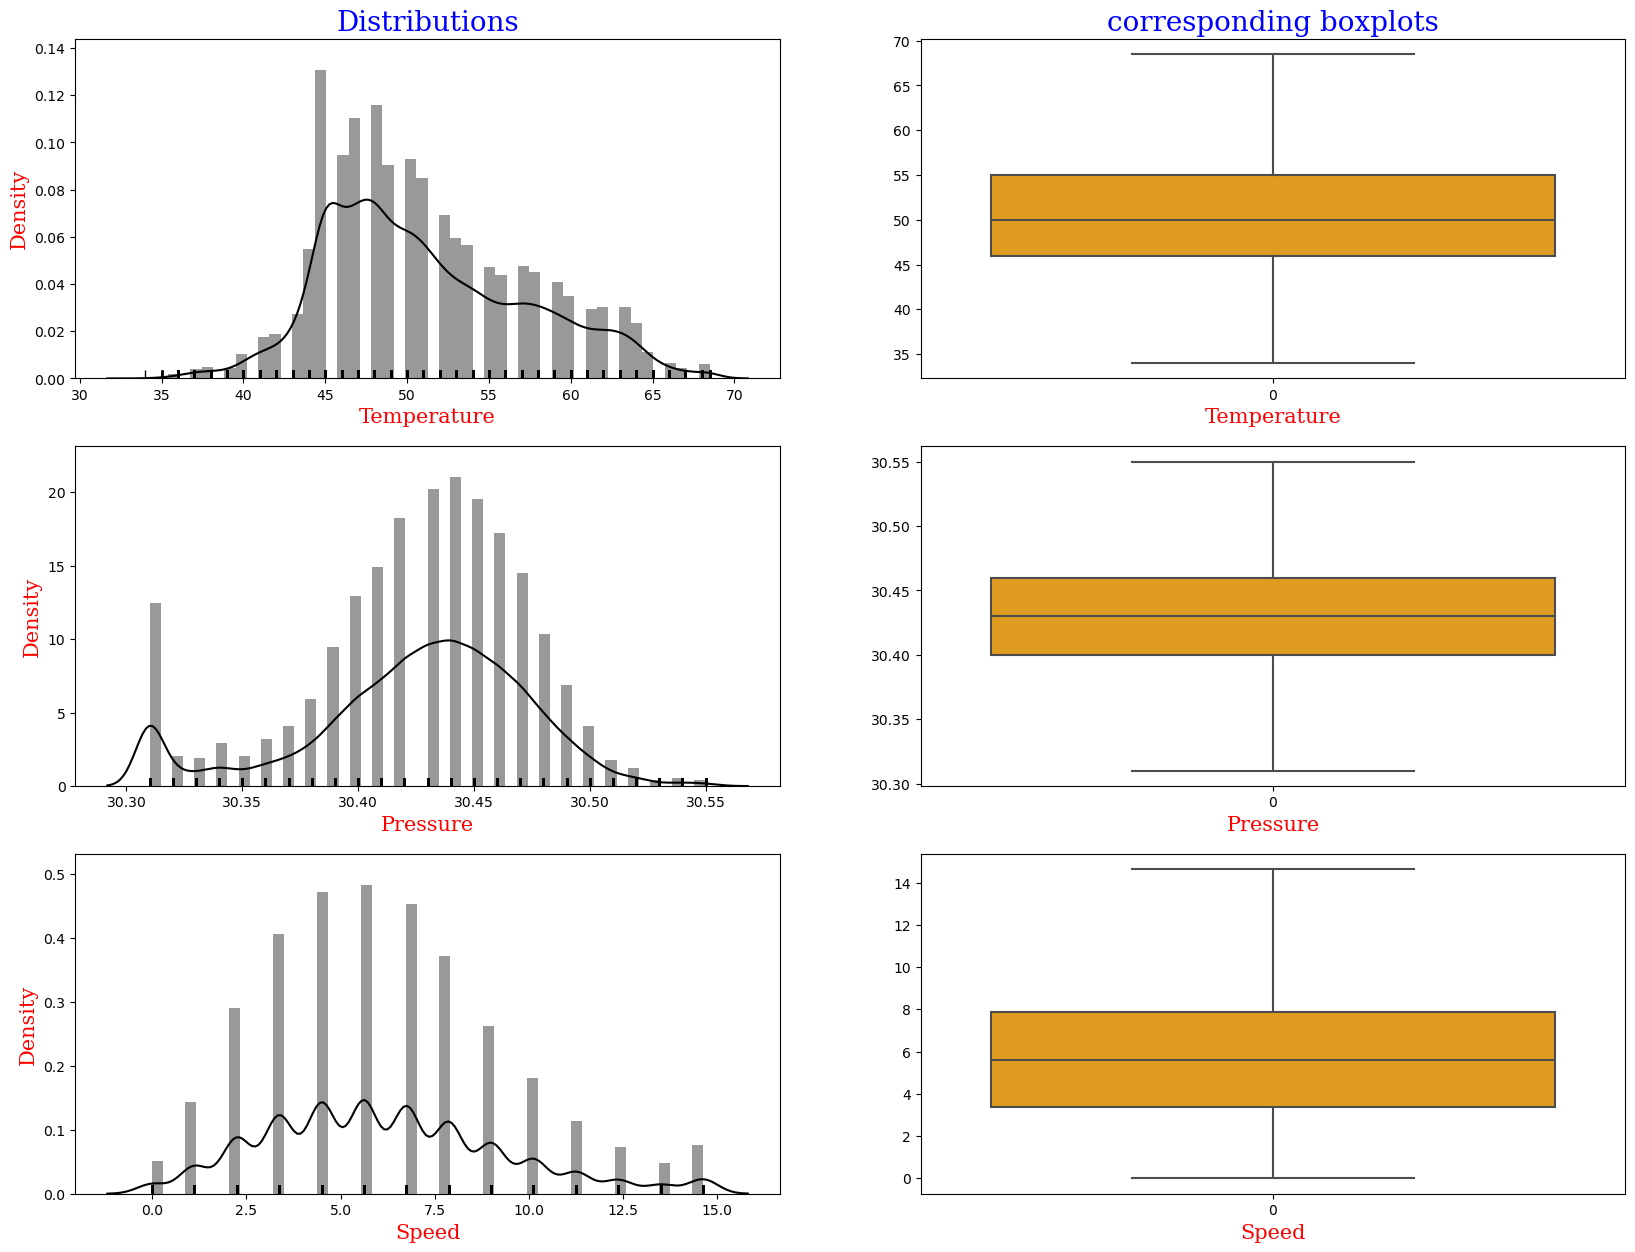

In [14]:
#after filling outliers with max and min
plt.figure(figsize=(20,15))

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.subplot(3,2,1)
plt.title("Distributions",fontdict=font1)
p=plt.xlabel("Temperature",fontdict=font2)
p.set_color("red")
p=plt.ylabel("Density",fontdict=font2)
p.set_color("red")
sns.distplot(df['Temperature'],rug=True,color='black')
plt.subplot(3,2,2)
plt.title("corresponding boxplots",fontdict=font1)
p=plt.xlabel("Temperature",fontdict=font2)
p.set_color("red")
sns.boxplot(df['Temperature'],color='orange')

plt.subplot(3,2,3)
p=plt.xlabel("Pressure",fontdict=font2)
p.set_color("red")
p=plt.ylabel("Density",fontdict=font2)
p.set_color("red")
sns.distplot(df['Pressure'],rug=True,color='black')
plt.subplot(3,2,4)
p=plt.xlabel("Pressure",fontdict=font2)
p.set_color("red")
sns.boxplot(df['Pressure'],color='orange')


plt.subplot(3,2,5)
p=plt.xlabel("Speed",fontdict=font2)
p.set_color("red")
p=plt.ylabel("Density",fontdict=font2)
p.set_color("red")
sns.distplot(df['Speed'],rug=True,color='black')
plt.subplot(3,2,6)
p=plt.xlabel("Speed",fontdict=font2)
p.set_color("red")
sns.boxplot(df['Speed'],color='orange')

plt.show()

In [15]:
df.head()

,UNIXTime,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48.0,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48.0,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48.0,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48.0,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48.0,30.46,62,104.95,5.62,06:13:00,18:13:00


In [16]:
#extracting date from date feature
df['Date']=df['Date'].apply(lambda x: x.split()[0])
df.head()

,UNIXTime,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016,23:55:26,1.21,48.0,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016,23:50:23,1.21,48.0,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016,23:45:26,1.23,48.0,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016,23:40:21,1.21,48.0,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016,23:35:24,1.17,48.0,30.46,62,104.95,5.62,06:13:00,18:13:00


In [17]:
#extracting the day,month,hour,minute,sec from date and time features
df['Month']=pd.to_datetime(df['Date']).dt.month
df['Day']=pd.to_datetime(df['Date']).dt.day
df['Hour']=pd.to_datetime(df['Time']).dt.hour
df['Minute']=pd.to_datetime(df['Time']).dt.minute
df['Second']=pd.to_datetime(df['Date']).dt.second
df.head()

,UNIXTime,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day,Hour,Minute,Second
0,1475229326,9/29/2016,23:55:26,1.21,48.0,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,23,55,0
1,1475229023,9/29/2016,23:50:23,1.21,48.0,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,23,50,0
2,1475228726,9/29/2016,23:45:26,1.23,48.0,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,23,45,0
3,1475228421,9/29/2016,23:40:21,1.21,48.0,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,23,40,0
4,1475228124,9/29/2016,23:35:24,1.17,48.0,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,23,35,0


In [18]:
# extract the sunrise and sunset information using regular expression
df['risehour'] = df['TimeSunRise'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
df['riseminuter'] = df['TimeSunRise'].apply(lambda x : re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)

df['sethour'] = df['TimeSunSet'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
df['setminute'] = df['TimeSunSet'].apply(lambda x : re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)
df.head()

,UNIXTime,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,Day,Hour,Minute,Second,risehour,riseminuter,sethour,setminute
0,1475229326,9/29/2016,23:55:26,1.21,48.0,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,23,55,0,6,13,18,13
1,1475229023,9/29/2016,23:50:23,1.21,48.0,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,23,50,0,6,13,18,13
2,1475228726,9/29/2016,23:45:26,1.23,48.0,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,23,45,0,6,13,18,13
3,1475228421,9/29/2016,23:40:21,1.21,48.0,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,23,40,0,6,13,18,13
4,1475228124,9/29/2016,23:35:24,1.17,48.0,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,23,35,0,6,13,18,13


In [19]:
#drop the features which are not required after extracting desire information
df.drop(columns=['UNIXTime','Date','Time','TimeSunRise','TimeSunSet'],axis=1,inplace=True)
df.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,risehour,riseminuter,sethour,setminute
0,1.21,48.0,30.46,59,177.39,5.62,9,29,23,55,0,6,13,18,13
1,1.21,48.0,30.46,58,176.78,3.37,9,29,23,50,0,6,13,18,13
2,1.23,48.0,30.46,57,158.75,3.37,9,29,23,45,0,6,13,18,13
3,1.21,48.0,30.46,60,137.71,3.37,9,29,23,40,0,6,13,18,13
4,1.17,48.0,30.46,62,104.95,5.62,9,29,23,35,0,6,13,18,13


In [20]:
#splitting the data into features and labels
X=df.drop('Radiation',axis=1)
Y=df['Radiation']
print(X.shape)
print(Y.shape)


(32686, 14)
(32686,)


### *Feature Engineering

* feature selection using correlation coefficient
$$
r=\frac{\sum\left(x_i-\bar{x}\right)\left(y_i-\bar{y}\right)}{\sqrt{\sum\left(x_i-\bar{x}\right)^2 \sum\left(y_i-\bar{y}\right)^2}}
$$
- $r=$ correlation coefficient
- $x_i=$ values of the $\mathrm{x}$-variable in a sample
- $\bar{x}=$ mean of the values of the $\mathrm{x}$-variable
- $y_i=$ values of the $y$-variable in a sample
- $\bar{y}=$ mean of the values of the $y$-variable
  
<div style="width:100%;height:0;border-bottom: 3px solid #F59A31;margin-bottom: 1rem;"></div>

In [21]:
#correaltion matrix
corr_mat=df.corr()
corr_mat

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,risehour,riseminuter,sethour,setminute
Radiation,1.000000,0.734831,0.127280,-0.226171,-0.230324,0.078178,-0.095450,0.039978,0.004398,-0.000730,NaN,NaN,-0.092850,0.048719,-0.039816
Temperature,0.734831,1.000000,0.314977,-0.284613,-0.259700,-0.037583,-0.354449,-0.124220,0.197740,-0.001922,NaN,NaN,-0.381032,0.300844,-0.242880
Pressure,0.127280,0.314977,1.000000,-0.250540,-0.216271,-0.008457,-0.325061,-0.024957,0.098771,0.001803,NaN,NaN,-0.363418,0.138642,-0.108588
Humidity,-0.226171,-0.284613,-0.250540,1.000000,-0.001833,-0.207280,-0.068854,0.014637,0.077899,0.000499,NaN,NaN,-0.023955,0.145143,-0.119526
WindDirection(Degrees),-0.230324,-0.259700,-0.216271,-0.001833,1.000000,0.064424,0.181485,-0.082354,-0.077969,-0.000602,NaN,NaN,0.176929,-0.078540,0.070030
Speed,0.078178,-0.037583,-0.008457,-0.207280,0.064424,1.000000,0.138759,0.126346,-0.074721,0.000107,NaN,NaN,0.154357,-0.159356,0.119862
Month,-0.095450,-0.354449,-0.325061,-0.068854,0.181485,0.138759,1.000000,0.038027,-0.005396,0.000168,NaN,NaN,0.952472,-0.784783,0.541883
Day,0.039978,-0.124220,-0.024957,0.014637,-0.082354,0.126346,0.038027,1.000000,-0.008010,-0.000196,NaN,NaN,0.274522,-0.263575,0.265662
Hour,0.004398,0.197740,0.098771,0.077899,-0.077969,-0.074721,-0.005396,-0.008010,1.000000,-0.004052,NaN,NaN,-0.006772,0.008629,-0.007056
Minute,-0.000730,-0.001922,0.001803,0.000499,-0.000602,0.000107,0.000168,-0.000196,-0.004052,1.000000,NaN,NaN,-0.000158,0.001052,-0.002215


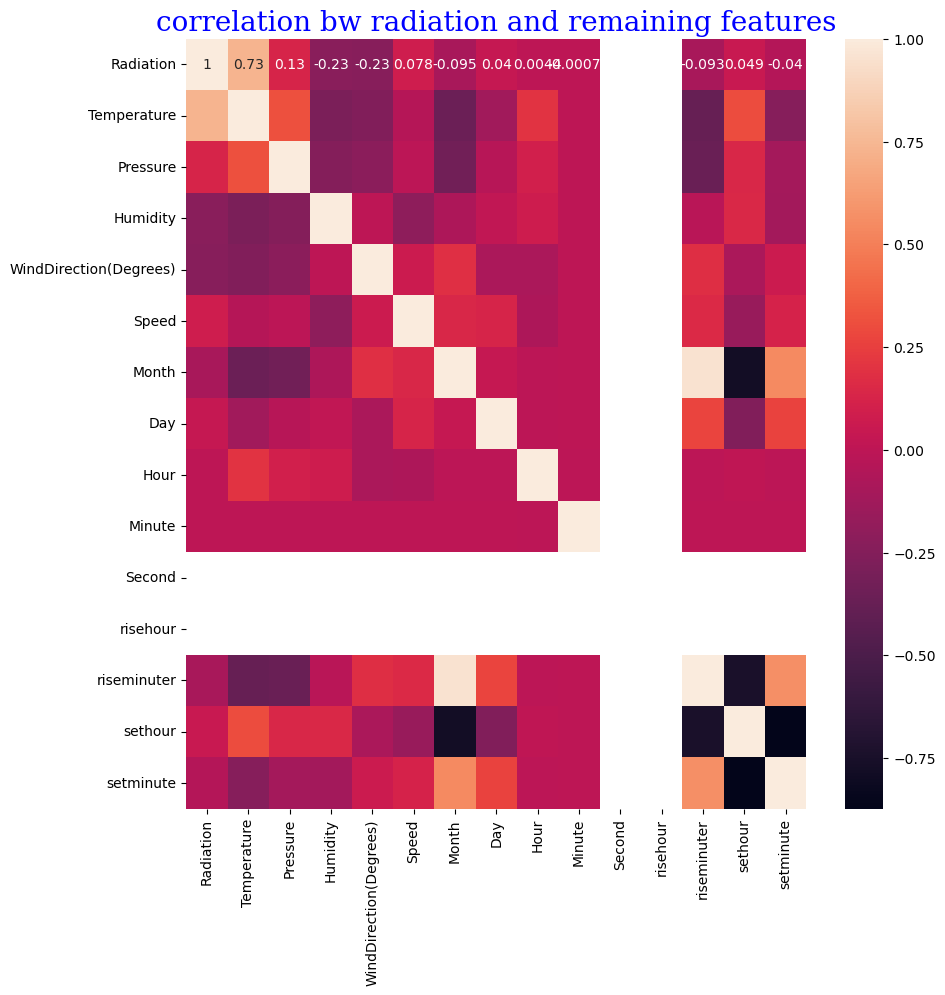

In [22]:
#heatmap of correlation matrix
plt.figure(figsize=(10,10))
plt.title("correlation bw radiation and remaining features",fontdict=font1)
sns.heatmap(df.corr(),annot=True)
plt.show()

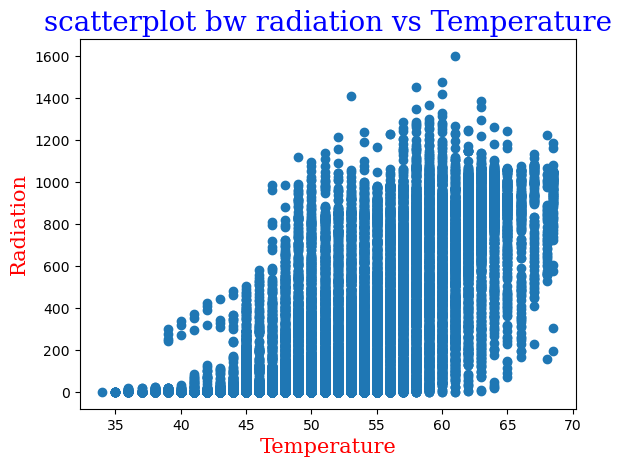

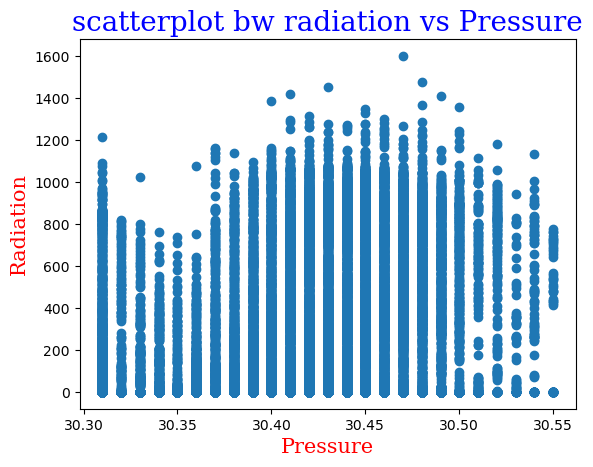

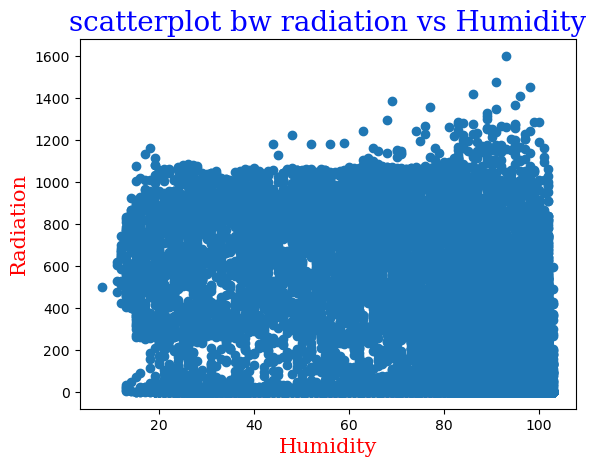

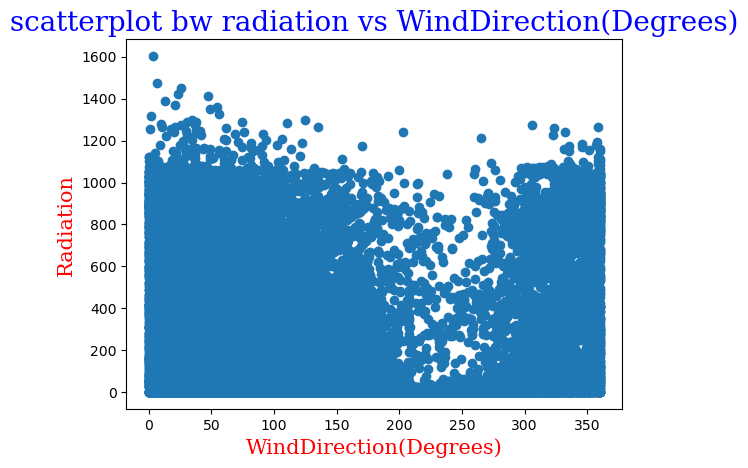

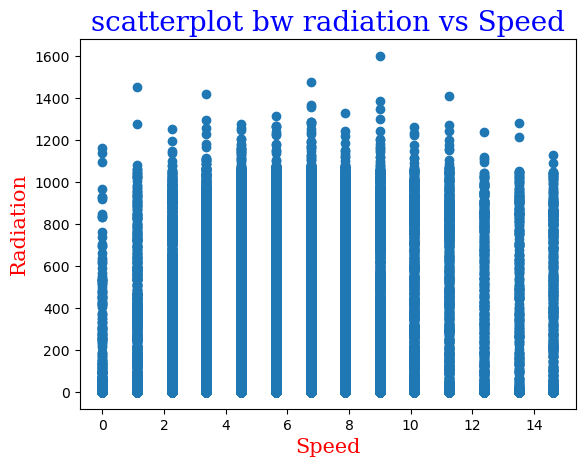

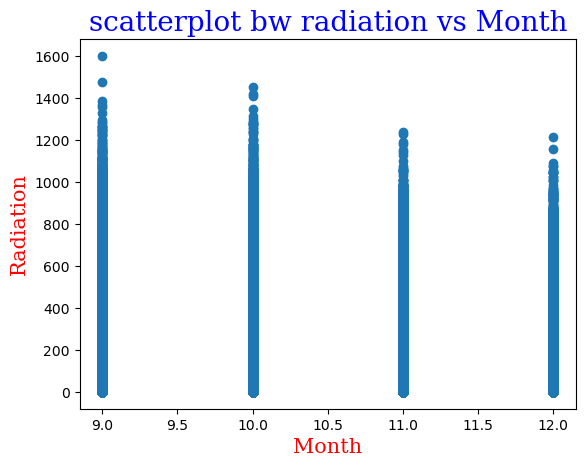

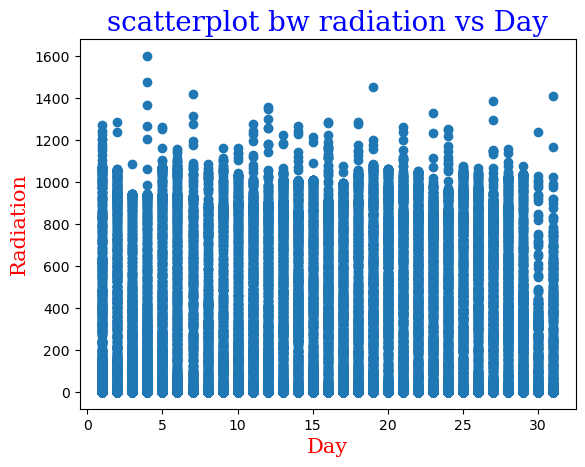

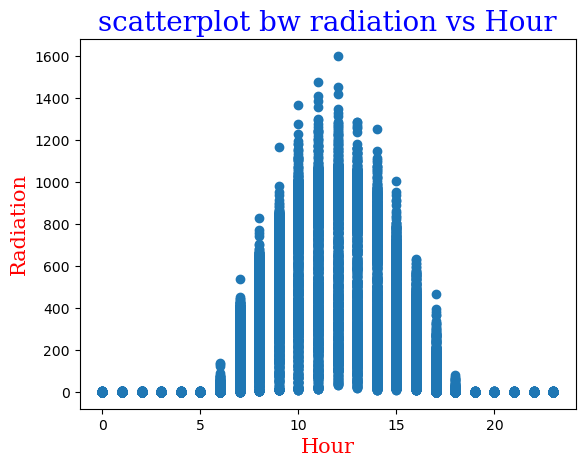

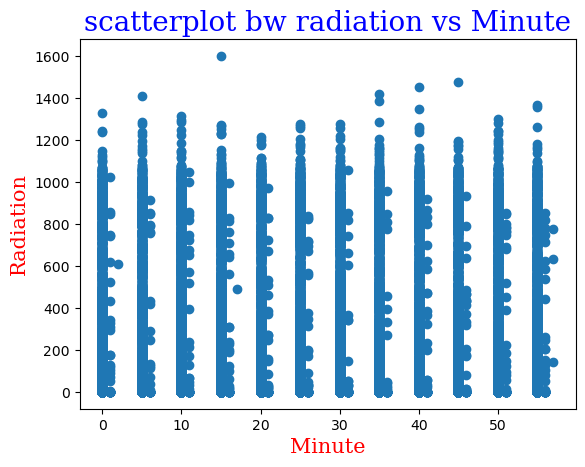

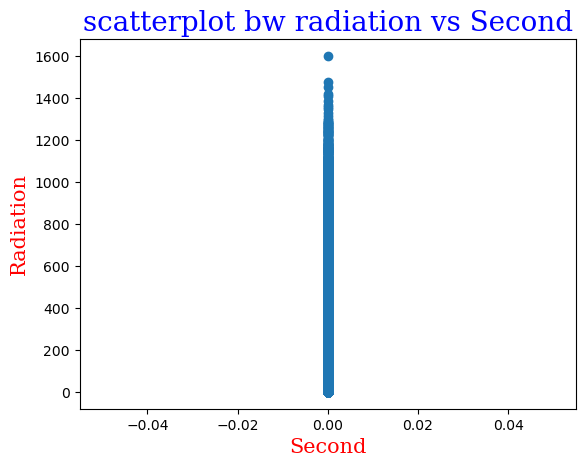

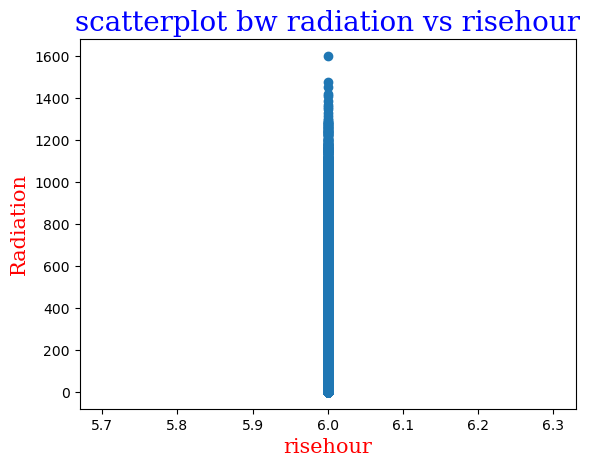

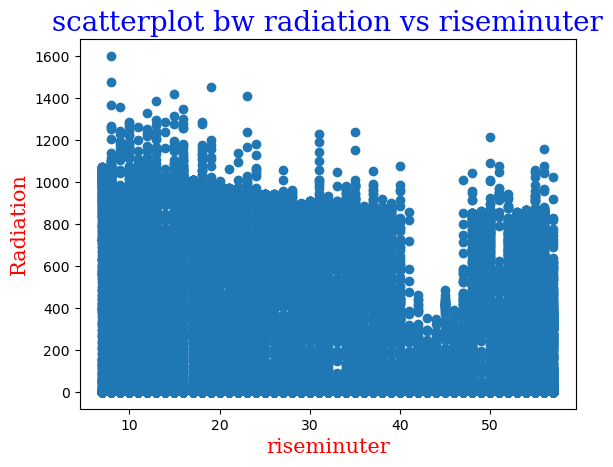

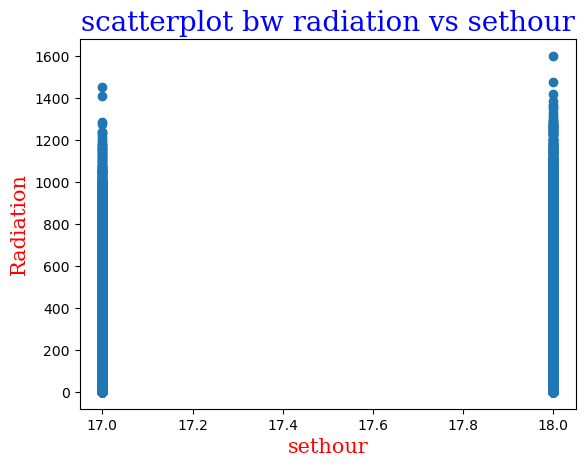

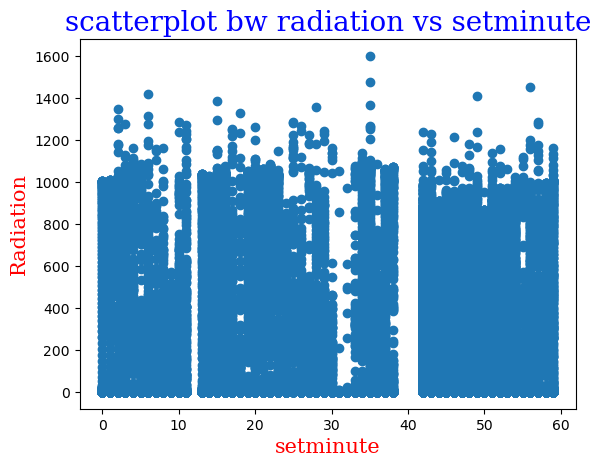

In [23]:
#visual realtion bw radiation and other features
for i in df.columns:
    if i!='Radiation':
        plt.title('scatterplot bw radiation vs '+i,fontdict=font1)
        p=plt.xlabel(i,fontdict=font2)
        p.set_color("red")
        p=plt.ylabel("Radiation",fontdict=font2)
        p.set_color("red")
        
        plt.scatter(x=df[i],y=df['Radiation'])
        
        plt.show()

In [24]:
#transformation of data
minmax_scaler = MinMaxScaler()
for i in X.columns:
    X[i]=minmax_scaler.fit_transform(np.array(X[i]).reshape(-1,1))

X.tail()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,Day,Hour,Minute,Second,risehour,riseminuter,sethour,setminute
32681,0.289855,0.500000,0.989474,0.403851,0.461696,1.0,0.0,0.0,0.350877,0.0,0.0,0.68,0.0,0.711864
32682,0.289855,0.458333,0.989474,0.327044,0.461696,1.0,0.0,0.0,0.263158,0.0,0.0,0.68,0.0,0.711864
32683,0.289855,0.458333,0.989474,0.403212,0.615595,1.0,0.0,0.0,0.175439,0.0,0.0,0.68,0.0,0.711864
32684,0.289855,0.458333,0.978947,0.456011,0.538304,1.0,0.0,0.0,0.087719,0.0,0.0,0.68,0.0,0.711864
32685,0.289855,0.500000,0.978947,0.232035,0.230506,1.0,0.0,0.0,0.000000,0.0,0.0,0.68,0.0,0.711864


In [25]:
#spliting the data into train and test data
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

print(xtrain.shape,xtest.shape)

(26148, 14) (6538, 14)


In [26]:
data_x=xtrain.iloc[0:20]
data_y=ytrain.iloc[0:20]

In [27]:
#divide data into 4 clients

c1_x=xtrain.iloc[0:7000]
c1_y=ytrain.iloc[0:7000]
c2_x=xtrain.iloc[7000:14000]
c2_y=ytrain.iloc[7000:14000]
c3_x=xtrain.iloc[14000:21000]
c3_y=ytrain.iloc[14000:21000]
c4_x=xtrain.iloc[21000:]
c4_y=ytrain.iloc[21000:]

print(c1_x.shape,c1_y.shape)
print(c2_x.shape,c2_y.shape)
print(c3_x.shape,c3_y.shape)
print(c4_x.shape,c4_y.shape)

(7000, 14) (7000,)
(7000, 14) (7000,)
(7000, 14) (7000,)
(5148, 14) (5148,)


## * federated learning using linear regression
<div style="width:100%;height:0;border-bottom: 3px solid #F59A31;margin-bottom: 1rem;"></div>

In [28]:
#model training & evaluation
model_server=LinearRegression()
model_server.fit(data_x,data_y)
print(model_server.intercept_)

model_c1=LinearRegression(fit_intercept=False)
model_c2=LinearRegression(fit_intercept=False)
model_c3=LinearRegression(fit_intercept=False)
model_c4=LinearRegression(fit_intercept=False)

mae_listr=[]
rounds=8
for i in range(rounds):
    print('')
    print('round-{}'.format(i+1))
    #client-1 model
    model_c1.intercept_=model_server.intercept_
    model_c1.coef_=model_server.coef_
    model_c1.fit(c1_x,c1_y)

    #clinet-2 model
    model_c2.intercept_=model_server.intercept_
    model_c2.coef_=model_server.coef_
    model_c2.fit(c2_x,c2_y)

    #client-3 model
    model_c3.intercept_=model_server.intercept_
    model_c3.coef_=model_server.coef_
    model_c3.fit(c3_x,c3_y)

    #client-4 model
    model_c4.intercept_=model_server.intercept_
    model_c4.coef_=model_server.coef_
    model_c4.fit(c4_x,c4_y)

    #averaging the parameters
    stacked_arrays = np.vstack((model_c1.coef_, model_c2.coef_, model_c3.coef_,model_c4.coef_,model_server.coef_))

    # Calculate the average along the specified axis (axis=0 for columns)
    server_coef = np.mean(stacked_arrays, axis=0)
    print('******************************************')
    print("Average coef values of server model:", server_coef)
    server_intercept=(model_c1.intercept_+model_c2.intercept_+model_c3.intercept_+model_c4.intercept_+model_server.intercept_)/5
    print("Average intercept values of server model:", (server_intercept))

    #update parameters of server_model
    
    model_server.intercept_=server_intercept
    model_server.coef_=server_coef
    
    ypred=model_server.predict(xtest)
    
    #evaluation parameters
    rmse =np.sqrt(mean_squared_error(ytest, ypred))

    mae_listr.append(rmse)
    r2 = r2_score(ytest, ypred) 

    print('\n')
    print("Testing performance")
    
    print("rmse: {:.2f}".format(rmse))
    print("R2: {:.2f}".format(r2))
    
    

-1145.2910754888383

round-1
******************************************
Average coef values of server model: [ 1.40958575e+03 -9.58697741e+01  9.46433154e+01 -2.47263723e+02
  3.04692739e+01 -2.37197484e+02 -1.21154078e+01 -1.66822495e+02
 -2.85683638e+01  7.95807864e-14  7.10542736e-14  3.61456839e+02
 -1.54281205e+02 -1.02825615e+02]
Average intercept values of server model: -229.05821509776766


Testing performance
rmse: 199.39
R2: 0.60

round-2
******************************************
Average coef values of server model: [ 1.51050776e+03 -1.22377168e+02  4.84828954e+01 -1.16691070e+02
  7.99803177e+01 -6.49384251e+02 -1.19283680e+02 -1.66780532e+02
 -7.96554306e+00  4.54747351e-15 -5.68434189e-15  7.42440710e+02
 -3.21988446e+02 -2.76071589e+02]
Average intercept values of server model: -45.81164301955353


Testing performance
rmse: 193.87
R2: 0.62

round-3
******************************************
Average coef values of server model: [ 1.53069216e+03 -1.27678647e+02  3.92508115

In [29]:
ypred=model_server.predict(xtest)

#evaluation parameters
rmse =np.sqrt(mean_squared_error(ytest, ypred))
r2 = r2_score(ytest, ypred) 
mae = mean_absolute_error(ytest,ypred)

print('\n')
print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))
print("mae: {:.2f}".format(mae))



Testing performance
RMSE: 193.74
R2: 0.62
mae: 146.72


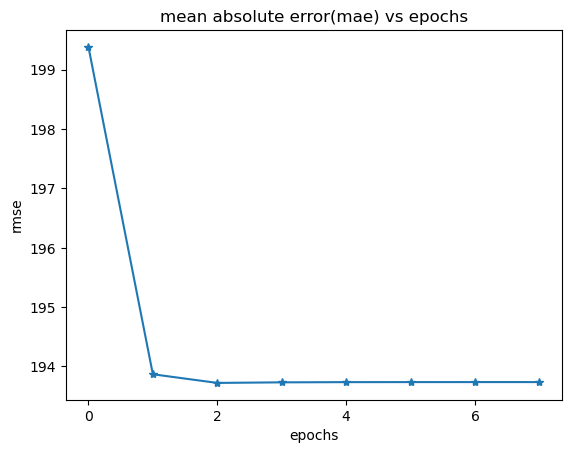

In [30]:
#plot the mae vs epochs
plt.title('mean absolute error(mae) vs epochs')
plt.xlabel('epochs')
plt.ylabel('rmse')
plt.xticks(range(0,len(mae_listr),2))
plt.plot(mae_listr,marker='*')
plt.show()

## * without federated learning  
<div style="width:100%;height:0;border-bottom: 3px solid #F59A31;margin-bottom: 1rem;"></div>

In [31]:
#model training
model=LinearRegression()
model.fit(xtrain,ytrain)
print(model.coef_)
print(model.intercept_)

[ 1.53979292e+03 -1.22238800e+02  4.63469849e+01 -8.11679485e+01
  9.82044284e+01 -3.45413930e+02 -2.34509749e+01 -1.67319337e+02
 -2.09907173e+00  0.00000000e+00 -3.33066907e-16  4.54215069e+02
 -2.03131857e+02 -1.53913289e+02]
-285.8875076092297


In [32]:
#model testing
ypred=model.predict(xtest)

In [33]:
#evaluation parameters
rmse =np.sqrt(mean_squared_error(ytest, ypred))
r2 = r2_score(ytest, ypred) 
mae = mean_absolute_error(ytest,ypred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))
print("mae: {:.2f}".format(mae))

Testing performance
RMSE: 193.44
R2: 0.62
mae: 146.50


### Federated learning Using MultiLayer Perceptron 
<div style="width:100%;height:0;border-bottom: 3px solid #F59A31;margin-bottom: 1rem;"></div>

In [53]:
def create_model():
    model = None
    model = Sequential()
    
    model.add(Dense(128, activation='relu', input_dim=14))
    model.add(Dropout(0.33))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.33))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.33))
    
    model.add(Dense(1, activation='linear'))

    return model
    

In [54]:
#model training & evaluation
model_server=create_model()
model_server.compile(metrics=['mse'], loss='mae', optimizer=Adam(learning_rate=0.001))

model_c1=create_model()
model_c2=create_model()
model_c3=create_model()
model_c4=create_model()

mae_list=[]

rounds=40
for i in range(rounds):
    print('')
    print('round-{}'.format(i+1))
    #client-1 model
    model_c1.compile(metrics=['mse'], loss='mae', optimizer=Adam(learning_rate=0.001))
    model_c1.set_weights(model_server.get_weights())
    model_c1.fit(c1_x,c1_y,validation_split=0.1, epochs=1, batch_size=32)

    print('*********************************')
    #clinet-2 model
    model_c2.compile(metrics=['mse'], loss='mae', optimizer=Adam(learning_rate=0.001))
    model_c2.set_weights(model_server.get_weights())
    model_c2.fit(c2_x,c2_y,validation_split=0.1, epochs=1, batch_size=32)

    print('***********************************')
    #client-3 model
    model_c3.compile(metrics=['mse'], loss='mae', optimizer=Adam(learning_rate=0.001))
    model_c3.set_weights(model_server.get_weights())
    model_c3.fit(c3_x,c3_y,validation_split=0.1, epochs=1, batch_size=32)

    print('***********************************')
    #client-4 model
    model_c4.compile(metrics=['mse'], loss='mae', optimizer=Adam(learning_rate=0.001))
    model_c4.set_weights(model_server.get_weights())
    model_c4.fit(c4_x,c4_y,validation_split=0.1, epochs=1, batch_size=32)

    #averaging the parameters

    avg_weights=[(model_c1.get_weights()[i]+model_c2.get_weights()[i]+model_c3.get_weights()[i]+model_c4.get_weights()[i]+model_server.get_weights()[i])/5 for i in range(len(model_server.get_weights()))]
    
    model_server.set_weights(avg_weights)

    mae = mean_absolute_error(ytest,model_server.predict(xtest))

    mae_list.append(mae)
    
    print(f'mean absolute error: {mae}')
    


round-1
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 204.5839 - mse: 139515.0156 - val_loss: 210.8137 - val_mse: 140712.0781
*********************************
197/197 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 203.1134 - mse: 138032.2500 - val_loss: 225.5082 - val_mse: 150478.5312
***********************************
197/197 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 211.6274 - mse: 147449.0000 - val_loss: 190.6777 - val_mse: 122828.6641
***********************************
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 211.2337 - mse: 147239.7969 - val_loss: 211.2494 - val_mse: 142259.6406
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
mean absolute error: 200.70941996218707

round-2
197/197 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 193.2607 - mse: 126248.5859 - val_loss: 169.8689 - val_mse: 84352.5625
*********************************
197/197 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 201.5102 - mse: 135700.9688 - val_loss: 186.8837 - val_mse: 96768.2500
***********************************
1

In [55]:
mae = mean_absolute_error(ytest,model_server.predict(xtest))
print(f'mean absolute error: {mae}')

205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
mean absolute error: 60.494554008075895


## without federated learning
<div style="width:100%;height:0;border-bottom: 3px solid #F59A31;margin-bottom: 1rem;"></div>

In [56]:
model = None
model = Sequential()
    
model.add(Dense(128, activation='relu', input_dim=14))
model.add(Dropout(0.33))
    
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.33))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.33))

model.add(Dense(1, activation='linear'))

model.compile(metrics=['mse'], loss='mae', optimizer=Adam(learning_rate=0.001))
print(model.summary())

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                     │ (None, 128)                 │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [57]:
history = model.fit(xtrain, ytrain, validation_split=0.1, epochs=40, batch_size=32)


Epoch 1/40
736/736 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 184.2355 - mse: 115909.2578 - val_loss: 103.5159 - val_mse: 36652.7539
Epoch 2/40
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 104.0005 - mse: 37309.9219 - val_loss: 84.3895 - val_mse: 25666.6738
Epoch 3/40
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 88.3487 - mse: 28821.1191 - val_loss: 82.2389 - val_mse: 25383.3145
Epoch 4/40
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 84.1174 - mse: 26978.9375 - val_loss: 74.8456 - val_mse: 20682.5566
Epoch 5/40
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 82.2303 - mse: 25833.3340 - val_loss: 72.0626 - val_mse: 19457.5195
Epoch 6/40
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 79.5919 - mse: 24938.1348 - val_loss: 68.0300 - val_mse: 17425.9570
Epoch 7/40
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 80.1427 - mse: 24637.0039 - val_loss: 68.5706 - val_mse: 17872.2812
Epoch 8/40
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 77.7114 - mse: 23293.4492 - val_loss: 68

In [58]:
mean_absolute_error(ytest, model.predict(xtest))

205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


48.91881719935374

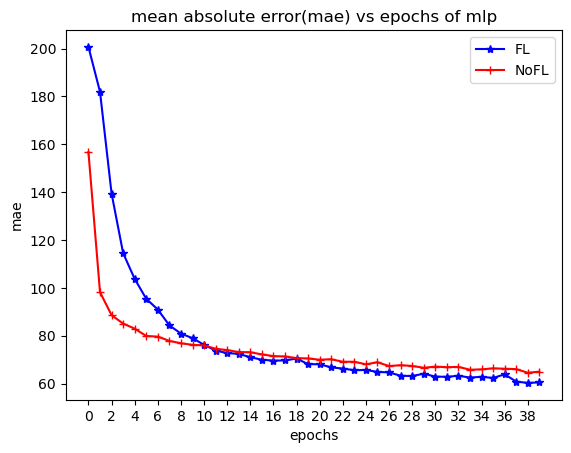

In [59]:
#plot the mae vs epochs
fit=history.history
plt.title('mean absolute error(mae) vs epochs of mlp')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.xticks(range(0,len(mae_list),2))
plt.plot(mae_list,marker='*',label='FL',color='blue')
plt.plot(fit['loss'],marker='+',label='NoFL',color='red')
plt.legend()
plt.show()

## Federated learning using Ridge Regressor
<div style="width:100%;height:0;border-bottom: 3px solid #F59A31;margin-bottom: 1rem;"></div>

In [60]:
#model training & evaluation
model_server=Ridge(alpha=0.1)
model_server.fit(data_x,data_y)
print(model_server.intercept_)

model_c1=Ridge(alpha=0.1)
model_c2=Ridge(alpha=0.1)
model_c3=Ridge(alpha=0.1)
model_c4=Ridge(alpha=0.1)

mse_list=[]
rounds=5
for i in range(rounds):
    print('')
    print('round-{}'.format(i+1))
    #client-1 model
    model_c1.intercept_=model_server.intercept_
    model_c1.coef_=model_server.coef_
    model_c1.fit(c1_x,c1_y)

    #clinet-2 model
    model_c2.intercept_=model_server.intercept_
    model_c2.coef_=model_server.coef_
    model_c2.fit(c2_x,c2_y)

    #client-3 model
    model_c3.intercept_=model_server.intercept_
    model_c3.coef_=model_server.coef_
    model_c3.fit(c3_x,c3_y)

    #client-4 model
    model_c4.intercept_=model_server.intercept_
    model_c4.coef_=model_server.coef_
    model_c4.fit(c4_x,c4_y)

    #averaging the parameters
    stacked_arrays = np.vstack((model_c1.coef_, model_c2.coef_, model_c3.coef_,model_c4.coef_,model_server.coef_))
    # Calculate the average along the specified axis (axis=0 for columns)
    server_coef = np.mean(stacked_arrays, axis=0)
    server_intercept=(model_c1.intercept_+model_c2.intercept_+model_c3.intercept_+model_c4.intercept_+model_server.intercept_)/5
    print('******************************************')
    print("Average coef values of server model:", server_coef)
    print("Average intercept values of server model:", (server_intercept))

    #update parameters of server_model
    
    model_server.intercept_=server_intercept
    model_server.coef_=server_coef
    
    ypred=model_server.predict(xtest)
    
    #evaluation parameters
    rmse =np.sqrt(mean_squared_error(ytest, ypred))
    r2 = r2_score(ytest, ypred) 
    mse_list.append(rmse)

    print('\n')
    print("Testing performance")
    
    print("RMSE: {:.2f}".format(rmse))
    print("R2: {:.2f}".format(r2))

15.097673430802814

round-1
******************************************
Average coef values of server model: [1370.57941212  -82.60898539   84.43679592 -193.02907039   10.95450608
 -232.54613168  -21.35805463 -149.57396399  -19.51325568    0.
    0.          361.119728   -140.84259531 -107.27794544]
Average intercept values of server model: -236.70306532454782


Testing performance
RMSE: 198.54
R2: 0.60

round-2
******************************************
Average coef values of server model: [1505.69659233 -114.27387848   53.919519   -103.21710589   79.99425813
 -305.93358809  -17.47848648 -163.2943551    -5.2151603     0.
    0.          419.27536632 -184.3138304  -137.85179391]
Average intercept values of server model: -287.06321307561797


Testing performance
RMSE: 193.62
R2: 0.62

round-3
******************************************
Average coef values of server model: [1532.72002837 -120.6068571    47.81606362  -85.254713     93.80220853
 -320.61107937  -16.70257286 -166.03843332   -2

In [61]:
ypred=model_server.predict(xtest)

#evaluation parameters
rmse =np.sqrt(mean_squared_error(ytest, ypred))
r2 = r2_score(ytest, ypred) 
mae = mean_absolute_error(ytest,ypred)

print('\n')
print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))
print("mae: {:.2f}".format(mae))



Testing performance
RMSE: 193.45
R2: 0.62
mae: 146.50


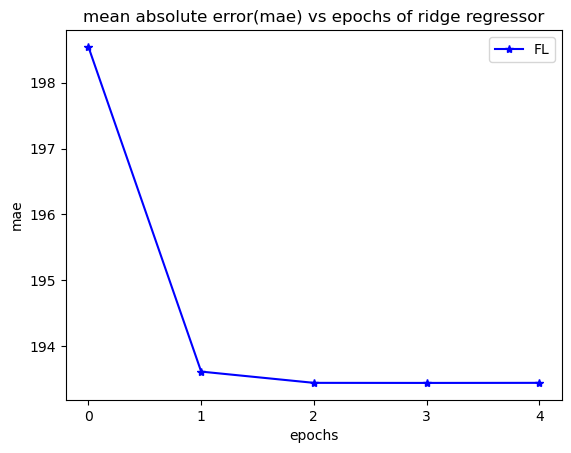

In [62]:
#plot the mae vs epochs
fit=history.history
plt.title('mean absolute error(mae) vs epochs of ridge regressor')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.xticks(range(0,len(mae_list),1))
plt.plot(mse_list,marker='*',label='FL',color='blue')
plt.legend()
plt.show()

## without federated learning
<div style="width:100%;height:0;border-bottom: 3px solid #F59A31;margin-bottom: 1rem;"></div>

In [63]:
#model training
model=Ridge(alpha=0.1)
model.fit(xtrain,ytrain)
print(model.coef_)
print(model.intercept_)

[1539.46224508 -122.20711507   46.38998569  -81.18860454   98.23282163
 -336.59574379  -20.79263869 -167.28228575   -2.10200582    0.
    0.          445.68508995 -199.83031209 -150.57793504]
-291.3252597794941


In [64]:
#model testing
ypred=model.predict(xtest)

In [65]:
#evaluation parameters
rmse =np.sqrt(mean_squared_error(ytest, ypred))
r2 = r2_score(ytest, ypred) 
mae = mean_absolute_error(ytest,ypred)

print("Testing performance")

print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))
print("mae: {:.2f}".format(mae))

Testing performance
RMSE: 193.44
R2: 0.62
mae: 146.50


## Federated Learning using RNN
<div style="width:100%;height:0;border-bottom: 3px solid #F59A31;margin-bottom: 1rem;"></div>

In [72]:
def create_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, input_shape=input_shape),
        tf.keras.layers.Dense(1)
    ])
    return model

In [86]:
input_shape = (10, 1)

#model training & evaluation
model_server=create_model(input_shape)
model_server.compile(metrics=['mse'], loss='mae', optimizer=Adam(learning_rate=0.001))

model_c1=create_model(input_shape)
model_c2=create_model(input_shape)
model_c3=create_model(input_shape)
model_c4=create_model(input_shape)

mae_listrnn=[]
#train_dataset = create_dataset(train_data, WINDOW_SIZE).batch(BATCH_SIZE)
#val_dataset = create_dataset(val_data, WINDOW_SIZE).batch(BATCH_SIZE)

rounds=50
for i in range(rounds):
    print('')
    print('round-{}'.format(i+1))
    #client-1 model
    model_c1.compile(metrics=['mse'], loss='mae', optimizer=Adam(learning_rate=0.001))
    model_c1.set_weights(model_server.get_weights())
    
    model_c1.fit(c1_x,c1_y,validation_split=0.1, epochs=2, batch_size=32)

    print('*********************************')
    #clinet-2 model
    model_c2.compile(metrics=['mse'], loss='mae', optimizer=Adam(learning_rate=0.001))
    model_c2.set_weights(model_server.get_weights())
    model_c2.fit(c2_x,c2_y,validation_split=0.1, epochs=2, batch_size=32)

    print('***********************************')
    #client-3 model
    model_c3.compile(metrics=['mse'], loss='mae', optimizer=Adam(learning_rate=0.001))
    model_c3.set_weights(model_server.get_weights())
    model_c3.fit(c3_x,c3_y,validation_split=0.1, epochs=2, batch_size=32)

    print('***********************************')
    #client-4 model
    model_c4.compile(metrics=['mse'], loss='mae', optimizer=Adam(learning_rate=0.001))
    model_c4.set_weights(model_server.get_weights())
    model_c4.fit(c4_x,c4_y,validation_split=0.1, epochs=2, batch_size=32)

    #averaging the parameters

    avg_weights=[(model_c1.get_weights()[i]+model_c2.get_weights()[i]+model_c3.get_weights()[i]+model_c4.get_weights()[i]+model_server.get_weights()[i])/5 for i in range(len(model_server.get_weights()))]
    
    model_server.set_weights(avg_weights)

    mae = mean_absolute_error(ytest,model_server.predict(xtest))
    mae_listrnn.append(mae)
    print(f'mean absolute error: {mae}')


round-1
Epoch 1/2
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 198.6666 - mse: 133291.2812 - val_loss: 209.9901 - val_mse: 142058.5469
Epoch 2/2
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 196.5887 - mse: 131335.3281 - val_loss: 206.3783 - val_mse: 138201.8750
*********************************
Epoch 1/2
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 198.6861 - mse: 134077.0625 - val_loss: 225.9069 - val_mse: 153677.8438
Epoch 2/2
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 197.3905 - mse: 134254.0625 - val_loss: 222.4731 - val_mse: 146654.4219
***********************************
Epoch 1/2
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 208.9964 - mse: 145547.5312 - val_loss: 190.2527 - val_mse: 124155.0859
Epoch 2/2
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 200.3763 - mse: 135820.6094 - val_loss: 186.2162 - val_mse: 119806.2031
***********************************
Epoch 1/2
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 205.6396 - mse: 144657.8438 - val_loss: 

In [87]:
mae = mean_absolute_error(ytest,model_server.predict(xtest))
print(f'mean absolute error: {mae}')

205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
mean absolute error: 78.03478221551399


## without federated learning
<div style="width:100%;height:0;border-bottom: 3px solid #F59A31;margin-bottom: 1rem;"></div>

In [88]:
model=create_model(input_shape)
model.compile(metrics=['mse'], loss='mae', optimizer=Adam(learning_rate=0.001))
history=model.fit(xtrain,ytrain,validation_split=0.1, epochs=50, batch_size=32)

Epoch 1/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 201.5463 - mse: 136409.2344 - val_loss: 204.2090 - val_mse: 133796.5312
Epoch 2/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 185.5462 - mse: 118722.9766 - val_loss: 193.7895 - val_mse: 120322.5781
Epoch 3/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 180.1663 - mse: 111100.7109 - val_loss: 183.0865 - val_mse: 109572.7812
Epoch 4/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 169.9718 - mse: 99753.5781 - val_loss: 174.2079 - val_mse: 100554.9375
Epoch 5/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 159.8751 - mse: 89604.6953 - val_loss: 165.8577 - val_mse: 90217.8203
Epoch 6/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 153.3190 - mse: 82704.3438 - val_loss: 158.3513 - val_mse: 82033.4375
Epoch 7/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 144.6999 - mse: 73943.7656 - val_loss: 155.8646 - val_mse: 75990.6953
Epoch 8/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 138.4865 - mse: 68554.

In [89]:
mae = mean_absolute_error(ytest,model.predict(xtest))
print(f'mean absolute error: {mae}')

205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
mean absolute error: 46.961672751950935


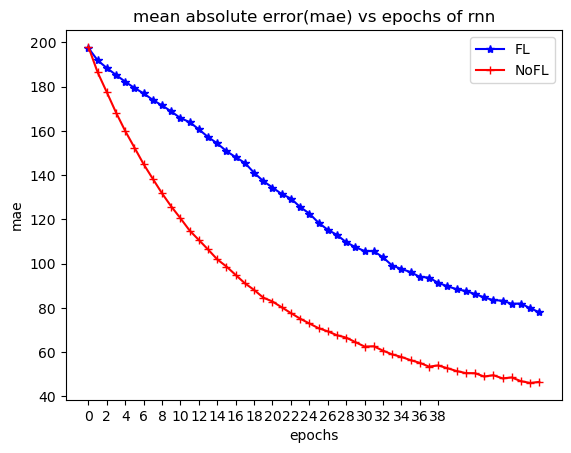

In [90]:
#plot the mae vs epochs
fit=history.history
plt.title('mean absolute error(mae) vs epochs of rnn')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.xticks(range(0,len(mae_list),2))
plt.plot(mae_listrnn,marker='*',label='FL',color='blue')
plt.plot(fit['loss'],marker='+',label='NoFL',color='red')
plt.legend()
plt.show()

# *comparision of models
<div style="width:100%;height:0;border-bottom: 3px solid #F59A31;margin-bottom: 1rem;"></div>

<img src="Screenshot 2024-04-05 023642.png" alt="comparision of models">)
>

